##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

## Preparation

Let's start with installing MediaPipe.

In [1]:
!pip install -q mediapipe==0.10.0
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 23.6 MB/s eta 0:00:00


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

## Visualization utilities

In [2]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.python.solutions.hands import HandLandmark
from mediapipe.framework.formats import landmark_pb2
import numpy as np
from mediapipe.python.solutions.drawing_utils import DrawingSpec
from mediapipe.python.solutions import hands_connections

_PALM_LANDMARKS = (HandLandmark.WRIST, HandLandmark.THUMB_CMC,
                   HandLandmark.INDEX_FINGER_MCP,
                   HandLandmark.MIDDLE_FINGER_MCP, HandLandmark.RING_FINGER_MCP,
                   HandLandmark.PINKY_MCP)
_THUMP_LANDMARKS = (HandLandmark.THUMB_MCP, HandLandmark.THUMB_IP,
                    HandLandmark.THUMB_TIP)
_INDEX_FINGER_LANDMARKS = (HandLandmark.INDEX_FINGER_PIP,
                           HandLandmark.INDEX_FINGER_DIP,
                           HandLandmark.INDEX_FINGER_TIP)
_MIDDLE_FINGER_LANDMARKS = (HandLandmark.MIDDLE_FINGER_PIP,
                            HandLandmark.MIDDLE_FINGER_DIP,
                            HandLandmark.MIDDLE_FINGER_TIP)
_RING_FINGER_LANDMARKS = (HandLandmark.RING_FINGER_PIP,
                          HandLandmark.RING_FINGER_DIP,
                          HandLandmark.RING_FINGER_TIP)
_PINKY_FINGER_LANDMARKS = (HandLandmark.PINKY_PIP, HandLandmark.PINKY_DIP,
                           HandLandmark.PINKY_TIP)
_RADIUS = 5
_THICKNESS_WRIST_MCP = 3
_THICKNESS_FINGER = 2
_THICKNESS_DOT = -1
_RED = (48, 48, 255)
_GREEN = (48, 255, 48)
_BLUE = (192, 101, 21)
_YELLOW = (0, 204, 255)
_GRAY = (128, 128, 128)
_PURPLE = (128, 64, 128)
_PEACH = (180, 229, 255)
_WHITE = (224, 224, 224)
_CYAN = (192, 255, 48)
_MAGENTA = (192, 48, 255)
#(177, 206, 251)
_HAND_LANDMARK_STYLE = {
    _PALM_LANDMARKS:
        DrawingSpec(
            color=(255, 48, 48), thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _THUMP_LANDMARKS:
        DrawingSpec(
            color=(255, 229, 180), thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _INDEX_FINGER_LANDMARKS:
        DrawingSpec(
            color=(128, 64, 128), thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _MIDDLE_FINGER_LANDMARKS:
        DrawingSpec(
            color=(255, 204, 0), thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _RING_FINGER_LANDMARKS:
        DrawingSpec(
            color=(48, 255, 48), thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _PINKY_FINGER_LANDMARKS:
        DrawingSpec(
            color=(21, 101, 192), thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
}

_HAND_CONNECTION_STYLE = {
    hands_connections.HAND_PALM_CONNECTIONS:
        DrawingSpec(color=_GRAY, thickness=_THICKNESS_WRIST_MCP),
    hands_connections.HAND_THUMB_CONNECTIONS:
        DrawingSpec(color=(255, 229, 180), thickness=_THICKNESS_FINGER),
    hands_connections.HAND_INDEX_FINGER_CONNECTIONS:
        DrawingSpec(color=(128, 64, 128), thickness=_THICKNESS_FINGER),
    hands_connections.HAND_MIDDLE_FINGER_CONNECTIONS:
        DrawingSpec(color=(255, 204, 0), thickness=_THICKNESS_FINGER),
    hands_connections.HAND_RING_FINGER_CONNECTIONS:
        DrawingSpec(color=(48, 255, 48), thickness=_THICKNESS_FINGER),
    hands_connections.HAND_PINKY_FINGER_CONNECTIONS:
        DrawingSpec(color=(21, 101, 192), thickness=_THICKNESS_FINGER)
}


def get_default_hand_landmarks_style():
  """Returns the default hand landmarks drawing style.

  Returns:
      A mapping from each hand landmark to its default drawing spec.
  """
  hand_landmark_style = {}
  for k, v in _HAND_LANDMARK_STYLE.items():
    for landmark in k:
      hand_landmark_style[landmark] = v
  return hand_landmark_style


def get_default_hand_connections_style():
  """Returns the default hand connections drawing style.

  Returns:
      A mapping from each hand connection to its default drawing spec.
  """
  hand_connection_style = {}
  for k, v in _HAND_CONNECTION_STYLE.items():
    for connection in k:
      hand_connection_style[connection] = v
  return hand_connection_style


MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      get_default_hand_landmarks_style(),
      get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    # cv2.putText(annotated_image, f"{handedness[0].category_name}",
    #             (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
    #             FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

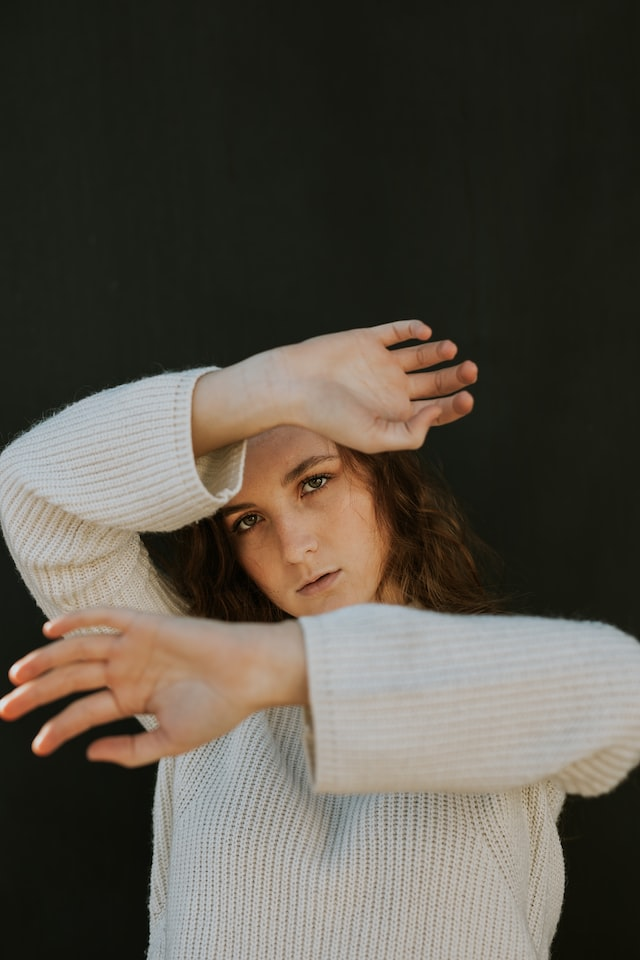

In [ ]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [6]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)
# from google.colab import drive
# drive.mount('/content/drive')


Saving cnet_img_example_scaled_translated.png to cnet_img_example_scaled_translated.png
Uploaded file: cnet_img_example_scaled_translated.png


## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


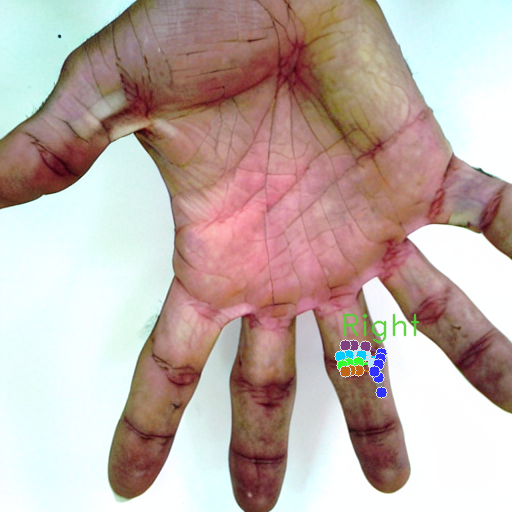

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9982618689537048, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.7446578741073608, y=0.7670919895172119, z=-3.027076616035629e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.73872971534729, y=0.7378495931625366, z=0.002221996895968914, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7288527488708496, y=0.7097535133361816, z=-0.0018164574867114425, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.713090181350708, y=0.6939862370491028, z=-0.007459837943315506, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6954634189605713, y=0.6892747282981873, z=-0.015575399622321129, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7457067966461182, y=0.6904537677764893, z=-0.005685718730092049, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7135733366012573, y=0.6773364543914795, z=-0.015805579721927643, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.690

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2,min_hand_detection_confidence=0,min_hand_presence_confidence=0.7)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
# image = mp.Image.create_from_file("xl-1.0-handshake_closeup_1 (1).jpg")
# image = mp.Image.create_from_file("image.jpg")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_left_hand_chkpt5000_steps30_2.png")
# image = mp.Image.create_from_file("back_of_fair-skinned_male_left_hand_chkpt5000_steps30_4.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_female_left_hand_chkpt5000_steps30_0.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt15000_steps30_1.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt15000_steps30_5.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt20000_steps30_3.png")
image = mp.Image.create_from_file("front_of_fair-skinned_male_left_hand_chkpt25000_steps30_3.png")
image = mp.Image.create_from_file("a_man_giving_a_thumbs_up_steps30_5 2.png")



# image = mp.Image.create_from_file("dog.jpeg")





# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
detection_result

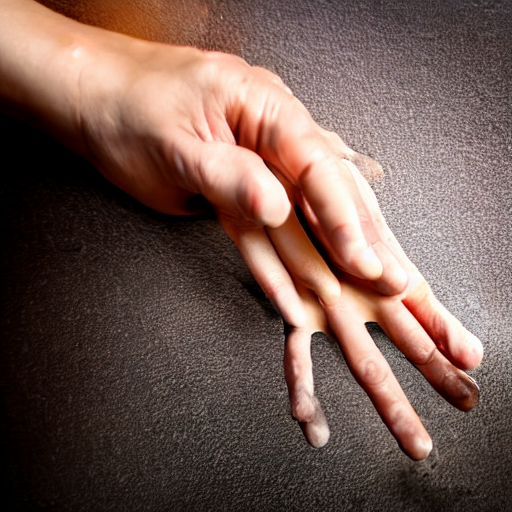

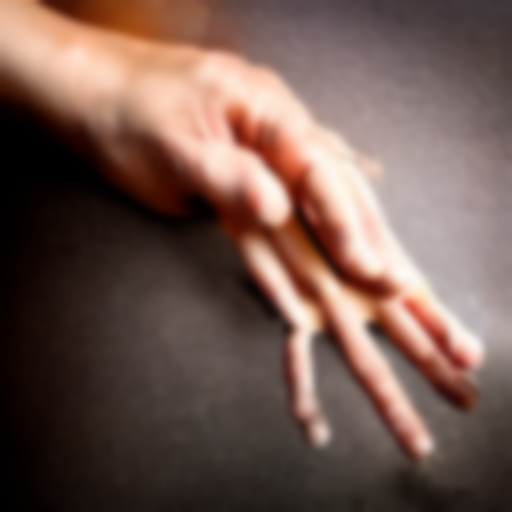

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('kdpm2d_img0_step430.61260986328125.png')
image = cv2.imread('kdpm2d_karras_img0_step517.0.png')
image = cv2.imread('karras_kdpm2d_short_img0_step0.0.png')
Gaussian = cv2.GaussianBlur(image, (25, 25), 0)
cv2_imshow(image)
cv2_imshow(Gaussian)
# cv2.imwrite('blurred_kdpm2d_img0_step430.61260986328125.png', Gaussian)
cv2.imwrite('blurred_karras_kdpm2d_short_img0_step0.0.png', Gaussian)


In [ ]:
dir(mp.Image)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'channels',
 'create_from_file',
 'height',
 'image_format',
 'is_aligned',
 'is_contiguous',
 'is_empty',
 'numpy_view',
 'step',
 'uses_gpu',
 'width']

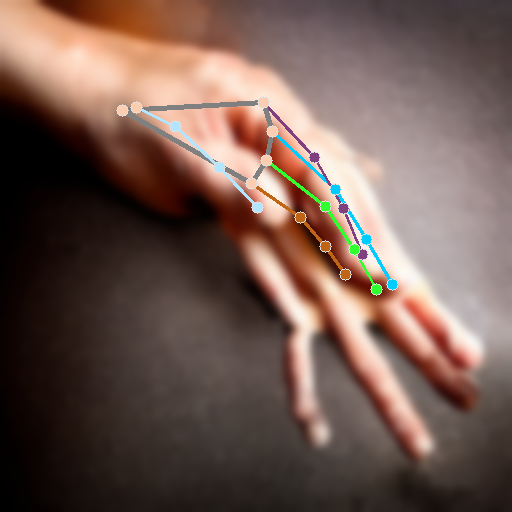

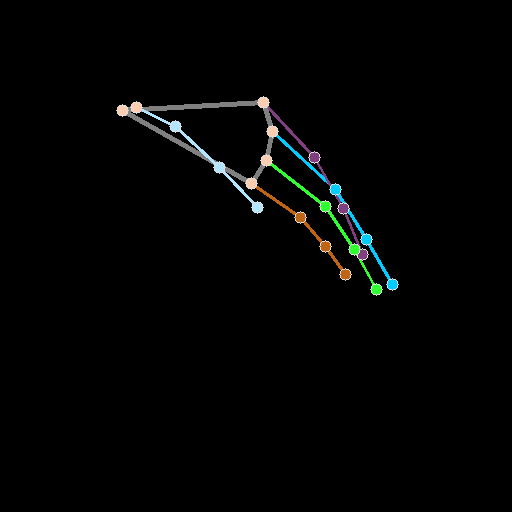

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9783839583396912, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.23982292413711548, y=0.21550211310386658, z=1.6075586017905152e-06, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.26701968908309937, y=0.21042199432849884, z=-0.1324138194322586, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.34216612577438354, y=0.24710102379322052, z=-0.19965706765651703, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.42861682176589966, y=0.32678261399269104, z=-0.24004191160202026, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5032757520675659, y=0.40608811378479004, z=-0.2762087285518646, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5136736631393433, y=0.19998711347579956, z=-0.1771574169397354, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6150960922241211, y=0.307578980922699, z=-0.26025381684303284, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=1,min_hand_detection_confidence=0,min_hand_presence_confidence=0)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
# image = mp.Image.create_from_file("xl-1.0-handshake_closeup_1 (1).jpg")
# image = mp.Image.create_from_file("image.jpg")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_left_hand_chkpt5000_steps30_2.png")
# image = mp.Image.create_from_file("back_of_fair-skinned_male_left_hand_chkpt5000_steps30_4.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_female_left_hand_chkpt5000_steps30_0.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt15000_steps30_1.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt15000_steps30_5.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt20000_steps30_3.png")
# image = mp.Image.create_from_file("blurred_kdpm2d_img0_step430.61260986328125.png")
# image = mp.Image.create_from_file("blurred_kdpm2d_karras_img0_step517.0.png")
image = mp.Image.create_from_file("blurred_karras_kdpm2d_short_img0_step0.0.png")



# image = mp.Image.create_from_file("dog.jpeg")hy





# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)
image = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGB2BGR)
black = np.zeros_like(image)
# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image, detection_result)
annotated_black = draw_landmarks_on_image(black, detection_result)
cv2_imshow(annotated_image)
cv2_imshow(annotated_black)
detection_result

In [4]:
!pip install diffusers accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 32.7 MB/s eta 0:00:00


In [8]:
import torch
from PIL import Image

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=1,min_hand_detection_confidence=0,min_hand_presence_confidence=0)
detector = vision.HandLandmarker.create_from_options(options)
image = mp.Image.create_from_file('cnet_img_example_scaled_translated_right_size.png')
detection_result = detector.detect(image)
image = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGB2BGR)
black = np.zeros_like(image)
annotated_black = draw_landmarks_on_image(black, detection_result)
cv2.imwrite(f"cnet_img_example_scaled_translated_right_size_generated_condition.png", annotated_black)


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
seed = 1234 # @param
import torch
from PIL import Image

from diffusers import StableDiffusionPipeline, StableDiffusionControlNetPipeline, ControlNetModel, KDPM2DiscreteScheduler
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2

base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=1,min_hand_detection_confidence=0,min_hand_presence_confidence=0)
detector = vision.HandLandmarker.create_from_options(options)


model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id,
                                              #  torch_dtype=torch.float16,
                                               torch_dtype=torch.float,
                                               use_safetensors=True,
                                               safety_checker=None,
                                               )
pipe.scheduler = KDPM2DiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')
# generator = [torch.Generator(device="cpu").manual_seed(i) for i in range(3)]
generator = torch.Generator(device="cuda").manual_seed(seed)

prompt = "a photo of a hand"
images = pipe(prompt, num_inference_steps=6,
          generator=generator,
          num_images_per_prompt=1,
          ).images
for image in images:
  filename = f"{prompt.replace(' ', '_')}_initial.png"
  image.save(filename)
  blurred = cv2.GaussianBlur(cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR), (25, 25), 0)
  cv2.imwrite(f"{prompt.replace(' ', '_')}_blurred.png", blurred)
  image = mp.Image.create_from_file(f"{prompt.replace(' ', '_')}_blurred.png")
  detection_result = detector.detect(image)
  image = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGB2BGR)
  black = np.zeros_like(image)
  annotated_image = draw_landmarks_on_image(image, detection_result)
  annotated_black = draw_landmarks_on_image(black, detection_result)
  cv2.imwrite(f"{prompt.replace(' ', '_')}_annotated.png", annotated_image)
  cv2.imwrite(f"{prompt.replace(' ', '_')}_condition.png", annotated_black)
  condition = Image.fromarray(annotated_black)


controlnet = ControlNetModel.from_pretrained("/content/drive/MyDrive/cs236 project/controlnet-hands", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_id, controlnet=controlnet, torch_dtype=torch.float16,
    safety_checker=None,
)
pipe.scheduler = KDPM2DiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')
generator = torch.Generator(device="cuda").manual_seed(seed)

# generator = [torch.Generator(device="cpu").manual_seed(i) for i in range(3)]
images = pipe(
    prompt, num_inference_steps=30, generator=generator, image=condition,
    num_images_per_prompt=3
).images
for i, image in enumerate(images):
  filename = f"{prompt.replace(' ', '_')}_controlled_{i}.png"
  image.save(filename)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'dropout': 0.0, 'sample_size': 32} were passed to ControlNetModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

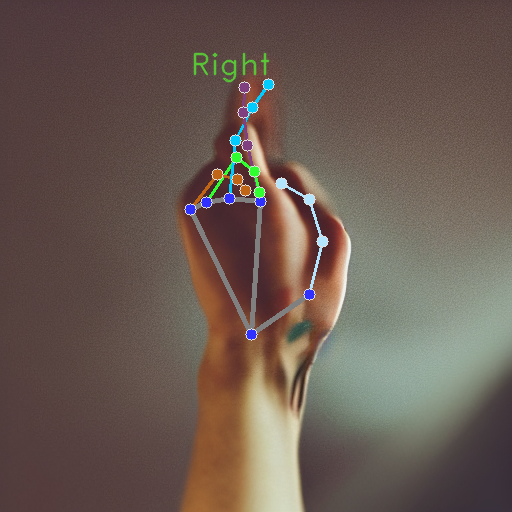

HandLandmarkerResult(handedness=[[Category(index=1, score=0.8613793849945068, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.49136748909950256, y=0.6541775465011597, z=7.720043413428357e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6041862964630127, y=0.575642466545105, z=0.0077341278083622456, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6303873658180237, y=0.47118785977363586, z=0.01641683466732502, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6053673624992371, y=0.38994932174682617, z=0.021709250286221504, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5501882433891296, y=0.35867640376091003, z=0.0274650901556015, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5081882476806641, y=0.3933333158493042, z=0.026933658868074417, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.48400455713272095, y=0.28419801592826843, z=0.036890413612127304, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4765

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=1,min_hand_detection_confidence=0,min_hand_presence_confidence=0)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
# image = mp.Image.create_from_file("xl-1.0-handshake_closeup_1 (1).jpg")
# image = mp.Image.create_from_file("image.jpg")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_left_hand_chkpt5000_steps30_2.png")
# image = mp.Image.create_from_file("back_of_fair-skinned_male_left_hand_chkpt5000_steps30_4.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_female_left_hand_chkpt5000_steps30_0.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt15000_steps30_1.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt15000_steps30_5.png")
# image = mp.Image.create_from_file("front_of_fair-skinned_male_right_hand_chkpt20000_steps30_3.png")
image = mp.Image.create_from_file("00003-1840439820.png")



# image = mp.Image.create_from_file("dog.jpeg")





# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
detection_result

In [ ]:
from PIL import Image
import numpy as np
import torch
import transformers

# !pip install transformers
# !pip install transformers>=4.10.0
!pip install torchmetrics[multimodal]

img = Image.open("hand-1701980_960_720.jpg")
arr = np.array(img)
# arr

# !pip install torchmetrics
from torchmetrics.multimodal.clip_score import CLIPScore
from functools import partial

clip_score_fn = CLIPScore("openai/clip-vit-base-patch16")


def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)


sd_clip_score = calculate_clip_score([arr], ['hands'])

ModuleNotFoundError: ignored

In [ ]:
import torchmetrics
torchmetrics.__version__

'1.2.0'